In [1]:
import pandas as pd
import mysql.connector
from mysql.connector import Error
from csv import reader
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sea

In [2]:
df = pd.read_csv("klub_szachowy.csv")
print("Wczytany plik csv")
df.head()

Wczytany plik csv


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,Madalyn,Japeth,10.0,214.0,110.0
2,2.0,Ermengarde,Fontana,138.0,82.0,96.0
3,3.0,Roseline,Chrystel,114.0,64.0,28.0
4,4.0,Cissiee,Love,65.0,285.0,118.0


In [3]:
try:
    global polaczenie
    polaczenie = mysql.connector.connect(host="localhost", user="root",
                                        password="", db="klubszachowy")
    if polaczenie.is_connected():
        print("Połączono z bazą danych")
except Error as e:
    print(e)

Połączono z bazą danych


In [4]:
cursor = polaczenie.cursor()
with open('klub_szachowy.csv', 'r') as objcsv:
    csvr = reader(objcsv)
    x = next(csvr)
    if x != None:
        for row in csvr:
            for i in csvr:
                dodaj = "insert into klubowicze(" \
                        "id, imie, nazwisko, zagrane, obejrzane, przeanalizowane) " \
                        "values (%s, %s, %s, %s, %s, %s)"
                v = (i[0], i[1], i[2], i[3], i[4], i[5])
                cursor.execute(dodaj, v)
                polaczenie.commit()

print("Dodano dane")

Dodano dane


In [5]:
pol1 = 'select * from klubowicze'
wyn = pd.read_sql_query(pol1, polaczenie)
wyn = pd.DataFrame(wyn)
wyn.to_csv("nowistarzyklubowicze.csv", index=False)
print("Stworzono nowy plik csv")

Stworzono nowy plik csv


In [6]:
df = pd.read_csv("nowistarzyklubowicze.csv")
print("Stworzony plik csv:")
df.head()

Stworzony plik csv:


,id,imie,nazwisko,zagrane,obejrzane,przeanalizowane
0,1,Madalyn,Japeth,10,214,110
1,2,Ermengarde,Fontana,138,82,96
2,3,Roseline,Chrystel,114,64,28
3,4,Cissiee,Love,65,285,118
4,5,Leeanne,Rooney,137,79,160


In [7]:
print("Maksymalna i minimalna liczba rozegranych gier przez pojedynczego gracza:")
print('Max ', np.max(df['zagrane']))
print('Min ', np.min(df['zagrane']))

Maksymalna i minimalna liczba rozegranych gier przez pojedynczego gracza:
Max  200
Min  1


In [8]:
print("Średnia wartość i mediana rozegranych gier przez wszystkich graczy:")
print('Mediana: ', np.median(df['zagrane']))
print('Średnia wartość: ', np.mean(df['zagrane']))

Średnia wartość i mediana rozegranych gier przez wszystkich graczy:
Mediana:  98.0
Średnia wartość:  98.244


In [9]:
print("Informacje statystyczne dotyczące przeanalizowanych gier:")
print('Wariancja: ', st.variance(df['przeanalizowane']))
print('Odchylenie standardowe: ', st.stdev(df['przeanalizowane']))
print('Dolna mediana: ', st.median_low(df['przeanalizowane']))
print('Górna mediana: ', st.median_high(df['przeanalizowane']))

Informacje statystyczne dotyczące przeanalizowanych gier:
Wariancja:  3246.961523046092
Odchylenie standardowe:  56.982115817562374
Dolna mediana:  103
Górna mediana:  104


Text(0.5, 0, 'Przeanalizowane')

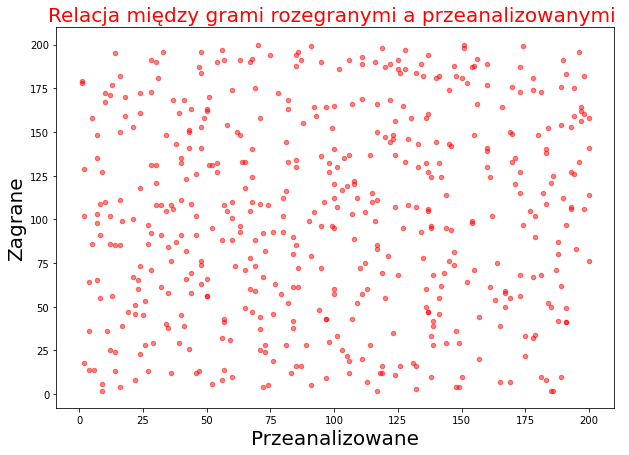

In [16]:
df.plot(kind='scatter', x='zagrane', y='przeanalizowane', color='red', alpha=0.5, figsize=(10 ,7))
plt.title('Relacja między grami rozegranymi a przeanalizowanymi ', size=20, color='red')
plt.ylabel('Zagrane', size=20);
plt.xlabel('Przeanalizowane', size=20)

<AxesSubplot:>

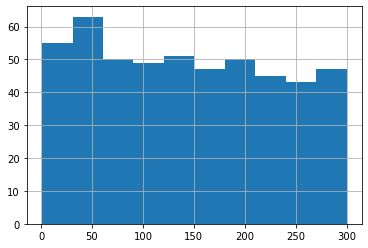

In [11]:
df['obejrzane'].hist()

In [12]:
polaczenie.close()